# Praktikum Pengantar Pembelajaran Mesin


---
## Bab 9. K-Means Clustering


### 1) Import Data

Unduh dataset yang akan digunakan pada praktikum kali ini. Anda dapat menggunakan aplikasi wget untuk mendowload dataset dan menyimpannya dalam Google Colab. Jalankan cell di bawah ini untuk mengunduh dataset

In [1]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2024-05-10 06:18:13--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2024-05-10 06:18:13 (44.0 MB/s) - ‘iris.csv’ saved [3975/3975]



Setelah dataset berhasil diunduh, langkah berikutnya adalah membaca dataset dengan memanfaatkan fungsi **readcsv** dari library pandas. Lakukan pembacaan berkas csv ke dalam dataframe dengan nama **data** menggunakan fungsi **readcsv**. Jangan lupa untuk melakukan import library pandas terlebih dahulu


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('iris.csv')



Cek isi dataset Anda dengan menggunakan perintah **head()**

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## 2) Preprocessing

Sebelum dilakukan proses clustering, perlu dilakukan beberapa tahapan pemrosesan awal data. Tahapan pertama adalah memisahkan kelas data dari dataframe, karena algoritma K-Means tidak memerlukan informasi kelas. Pisahkan kelas data ke dalam sebuah variabel bernama kelas.

In [4]:
kelas = data.pop('variety')

Pada praktikum kali ini, kita akan memvisualisasikan data hasil clustering menggunakan [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). Scatter plot hanya dapat digambarkan dalam bentuk 2 dimensi, dengan demikian data yang digunakan juga hanya terdiri dari 2 fitur. Hapus fitur **petal_length** dan **petal_width** pada data, sehingga fitur yang digunakan adalah **sepal_length** dan **sepal_width**

In [5]:
del data['petal.length']
del data['petal.width']

Salah satu tahap pada algoritma K-Means adalah perhitungan jarang Euclidean. Agar tidak ada fitur yang mendominasi pada perhitungan jarak, maka perlu dilakukan normalisasi terlebih dahulu agar rentang nilai setiap fitur sama. Implementasikan metode normalisasi min-max menggunakan fungsi bernama **minmax** pada cell di bawah ini. (Catatan : Anda pernah membuat fungsi ini di Praktikum 2)

In [6]:
def minmax(df_input):
  list_fitur = df_input.columns
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur] - min) / (max - min)
  return df_input

Lakukan normalisasi data dan simpan hasilnya pada variabel bernama **data_normal**




In [7]:
data_normal = minmax(data)

Tampilkan isi dataframe **data_normal**

In [8]:
data_normal.head()

,sepal.length,sepal.width
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


## 3) Visualisasi data

Visualisasi data dilakukan untuk memahami struktur dari data. Informasi ini dapat digunakan untuk mengetahui cara pembentukan cluster yang baik. Visualisasikan **data_normal** menggunakan scatter plot. Gunakan library matplotlib.pyplot

[]

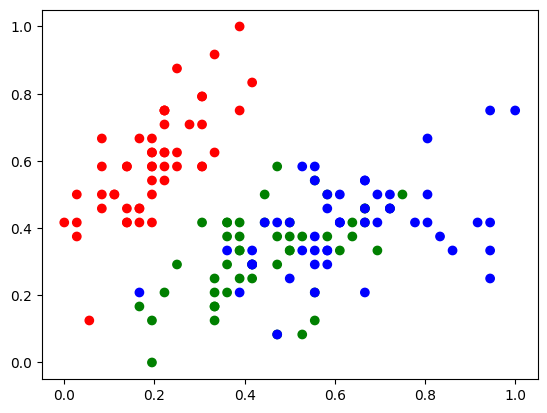

In [9]:
import matplotlib.pyplot as plt
warna = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}
plt.scatter(data_normal['sepal.length'], data_normal['sepal.width'], c = kelas.map(warna))
plt.plot()

## 4) K-Means Clustering

Sebelum mengimplementasikan algoritma K-Means, perlu dilakukan implementasi perhitungan jarak. K-Means pada praktikum ini menggunakan perhitungan jarak Euclidean. Implementasikan perhitungan jarak Euclidean menggunakan fungsi bernama **euclidean** pada cell di bawah ini

In [10]:
def euclidian(data1, data2):
  jarak = np.square(data1 - data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

Langkah selanjutnya adalah implementasi algoritma K-Means. Tahapan-tahapan dalam algoritma K-Means adalah:


1.   Penentuan keanggotaan cluster secara acak
2.   Hitung centroid berdasarkan data yang ada di masing-masing cluster
3.   Alokasikan masing-masing data ke centroid terdekat
4.   Kembali ke langkah 2 selama kondisi berhenti belum terpenuhi. Iterasi berhenti jika salah satu kondisi berikut terpenuhi:
     a. Tidak ada perubahan keanggotaan cluster
     
     b. Iterasi melebihi parameter *iter_max*

Implementasikan algoritma K-Means menggunakan fungsi bernama **kmeans** pada cell di bawah ini. Fungsi **kmeans** memiliki 3 parameter input, yaitu data, K, dan iter_max



In [11]:
from random import randint
import copy
def kmeans(data_input, k, iter_max=200):
  n_data = data_input.shape[0]
  n_fitur = data_input.shape[1]
  iter = 1
  # Assign cluster secara acak
  cluster = np.array([randint(0, k-1) for i in range(n_data)])
  # Set nilai centroid = 0
  centroid = np.zeros((k, n_fitur))
  cluster_tidak_berubah = False
  while cluster_tidak_berubah == False and iter < iter_max:
    jarak = np.zeros((n_data, k))
    # Perbarui nilai centroid
    for i in range(k):
      centroid[i,:] = data_input.iloc[np.where(cluster==i)[0]].mean().tolist()
    for i in range(n_data):
      # Hitung jarak eucledian
      for j in range(k):
        jarak[i][j] = euclidian(data_input.iloc[i], centroid[j])
    # Perbarui anggota cluster
    cluster_baru = [np.argmin(jarak[i]) for i in range(n_data)]
    # Cek apakah terjadi perubahan cluster atau tidak
    cluster_tidak_berubah = np.array_equal(cluster_baru, cluster)
    cluster = np.array(copy.deepcopy(cluster_baru))
    iter += 1
  return cluster

Lakukan clustering

In [12]:
cluster = kmeans(data_normal, 3)

Tampilkan keanggotaan cluster pada masing-masing data


In [13]:
print(cluster)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


Tampilkan hasil clustering menggunaka scatter plot

[]

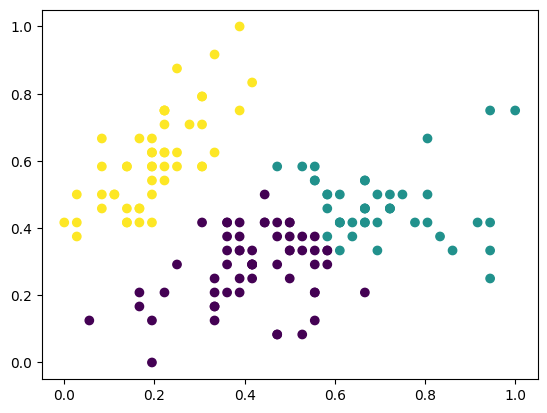

In [14]:
plt.scatter(data_normal['sepal.length'], data_normal['sepal.width'], c = cluster)
plt.plot()

## TUGAS
Pada tugas kali ini Anda mengidentifikasikan pasangan fitur apa yang menghasilkan cluster yang ideal pada K-Means menggunakan data Iris.

Buatlah plot untuk setiap pasangan fitur yang mungkin.

A. Sepal length vs Petal length

In [15]:
dataa = pd.read_csv('iris.csv')
kelasa = dataa.pop('variety')
dataa.drop(['sepal.width', 'petal.width'], axis=1, inplace=True)
dataa_normal = minmax(dataa)
dataa_normal

,sepal.length,petal.length
0,0.222222,0.067797
1,0.166667,0.067797
2,0.111111,0.050847
3,0.083333,0.084746
4,0.194444,0.067797
...,...,...
145,0.666667,0.711864
146,0.555556,0.677966
147,0.611111,0.711864
148,0.527778,0.745763


[]

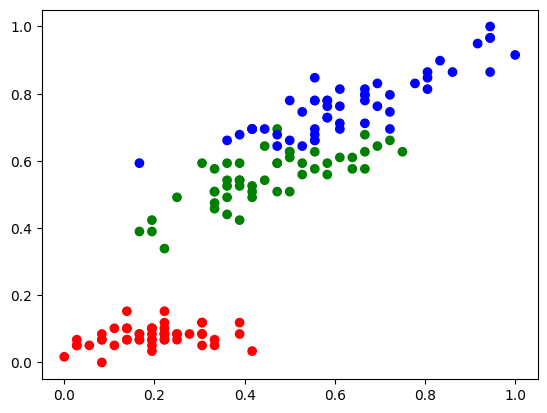

In [16]:
warna = {'Setosa':'red','Versicolor':'green','Virginica':'blue'}
plt.scatter(dataa_normal['sepal.length'],dataa_normal['petal.length'],c=kelasa.map(warna))
plt.plot()

B. Sepal length vs Petal width

In [17]:
datab = pd.read_csv('iris.csv')
kelasb = datab.pop('variety')
datab.drop(['sepal.width', 'petal.length'], axis=1, inplace=True)
datab_normal = minmax(datab)
datab_normal

,sepal.length,petal.width
0,0.222222,0.041667
1,0.166667,0.041667
2,0.111111,0.041667
3,0.083333,0.041667
4,0.194444,0.041667
...,...,...
145,0.666667,0.916667
146,0.555556,0.750000
147,0.611111,0.791667
148,0.527778,0.916667


[]

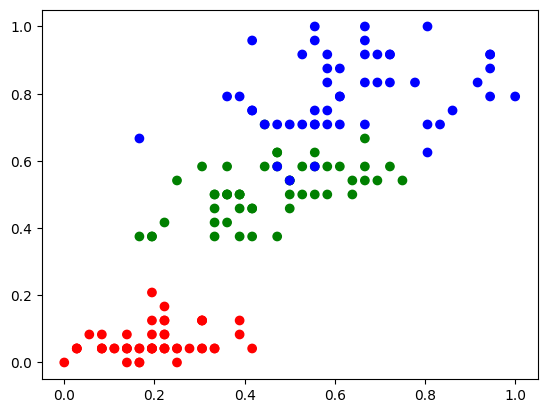

In [18]:
warna = {'Setosa':'red','Versicolor':'green','Virginica':'blue'}
plt.scatter(datab_normal['sepal.length'],datab_normal['petal.width'],c=kelasb.map(warna))
plt.plot()

C. Sepal Width vs Petal length

In [19]:
datac = pd.read_csv('iris.csv')
kelasc = datac.pop('variety')
datac.drop(['sepal.length', 'petal.width'], axis=1, inplace=True)
datac_normal = minmax(datac)
datac_normal

,sepal.width,petal.length
0,0.625000,0.067797
1,0.416667,0.067797
2,0.500000,0.050847
3,0.458333,0.084746
4,0.666667,0.067797
...,...,...
145,0.416667,0.711864
146,0.208333,0.677966
147,0.416667,0.711864
148,0.583333,0.745763


[]

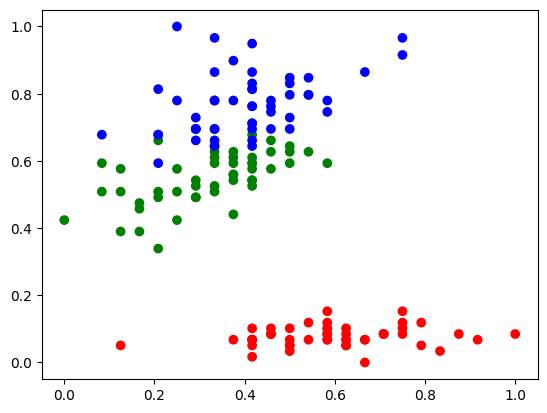

In [20]:
warna = {'Setosa':'red','Versicolor':'green','Virginica':'blue'}
plt.scatter(datac_normal['sepal.width'],datac_normal['petal.length'],c=kelasc.map(warna))
plt.plot()

D. Sepal Width vs Petal width

In [21]:
datad = pd.read_csv('iris.csv')
kelasd = datad.pop('variety')
datad.drop(['sepal.length', 'petal.length'], axis=1, inplace=True)
datad_normal = minmax(datad)
datad_normal

,sepal.width,petal.width
0,0.625000,0.041667
1,0.416667,0.041667
2,0.500000,0.041667
3,0.458333,0.041667
4,0.666667,0.041667
...,...,...
145,0.416667,0.916667
146,0.208333,0.750000
147,0.416667,0.791667
148,0.583333,0.916667


[]

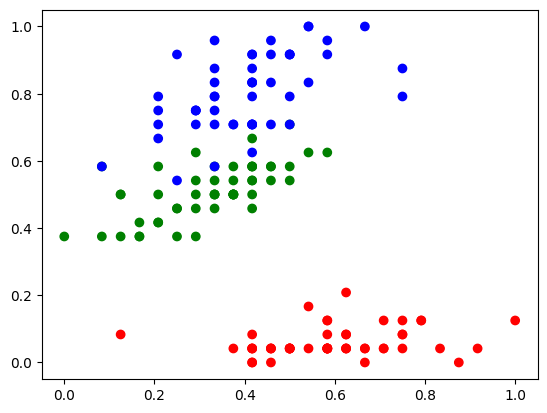

In [22]:
warna = {'Setosa':'red','Versicolor':'green','Virginica':'blue'}
plt.scatter(datad_normal['sepal.width'],datad_normal['petal.width'],c=kelasd.map(warna))
plt.plot()

Identifikasikan pasangan fitur apa yang dapat membedakan ketiga kelas dengan baik

E. Petal length vs Petal width

In [23]:
datae = pd.read_csv('iris.csv')
kelase = datae.pop('variety')
datae.drop(['sepal.width', 'sepal.length'], axis=1, inplace=True)
datae_normal = minmax(datae)
datae_normal

,petal.length,petal.width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


[]

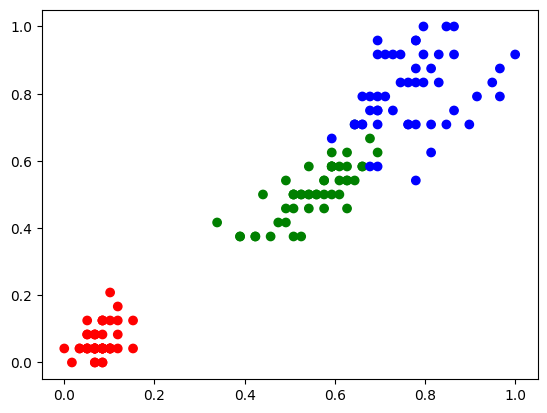

In [24]:
warna = {'Setosa':'red','Versicolor':'green','Virginica':'blue'}
plt.scatter(datae_normal['petal.length'],datae_normal['petal.width'],c=kelase.map(warna))
plt.plot()

[Tulis jawaban Anda di sini : Jelaskan mengapa pasangan fitur tersebut yang terbaik pada markdown ini]

Penjelasan : Scatter plot untuk pasangan fitur Petal Length dan Petal Width menunjukkan bahwa kelas Setosa secara jelas terpisah dari kelas Versicolor dan Virginica. Selain itu, terdapat pemisahan yang cukup baik antara kelas Versicolor dan Virginica.

Lakukan clustering menggunakan K-Means dengan k=3, apakah cluster yang dihasilkan juga terpisah dengan baik? Gunakan scatter plot untuk melihat hasil clustering

A. Sepal length vs Petal length

In [25]:
cluster = kmeans(dataa_normal,3)
print(cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


[]

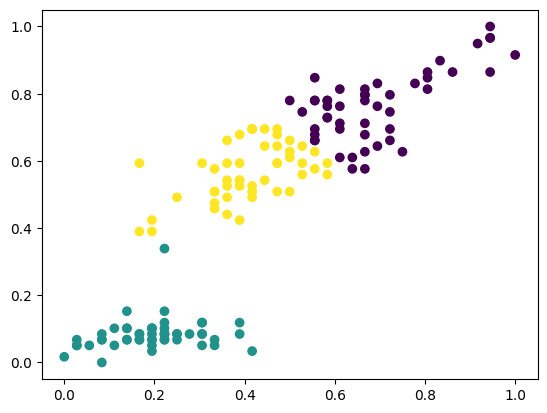

In [26]:
plt.scatter(dataa_normal['sepal.length'],dataa_normal ['petal.length'],c=cluster)
plt.plot()

Apakah hasilnya baik? Mengapa?

- buruk, masih ada yang menyatu.

B. Sepal length vs Petal width

In [27]:
cluster = kmeans(datab_normal,3)
print(cluster)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0]


[]

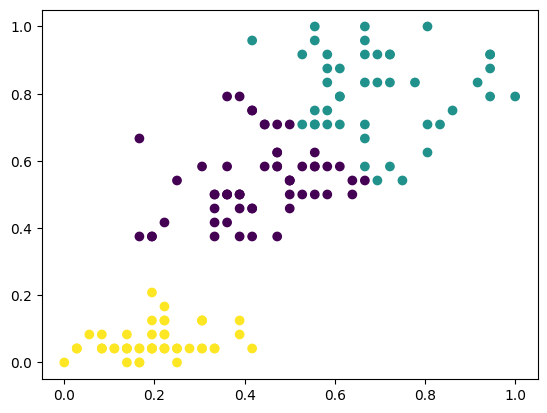

In [28]:
plt.scatter(datab_normal['sepal.length'],datab_normal ['petal.width'],c=cluster)
plt.plot()

Apakah hasilnya baik? Mengapa?

- baik, sudah sepenuhnya terpisah

C.Sepal width vs Petal length

In [29]:
cluster = kmeans(datac_normal,3)
print(cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


[]

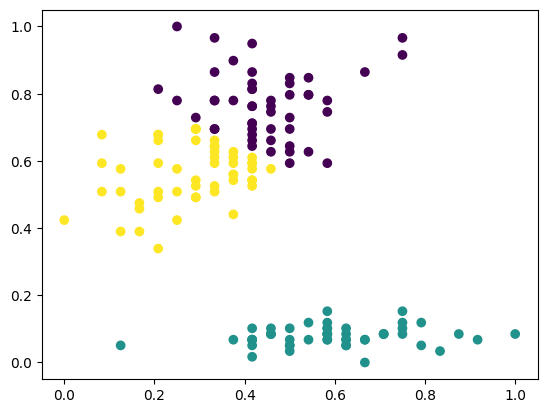

In [30]:
plt.scatter(datac_normal['sepal.width'],datac_normal ['petal.length'],c=cluster)
plt.plot()

Apakah hasilnya baik? Mengapa?

- buruk, masih ada yang menyatu.

D. Sepal width vs Petal width

In [31]:
cluster = kmeans(datad_normal,3)
print(cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[]

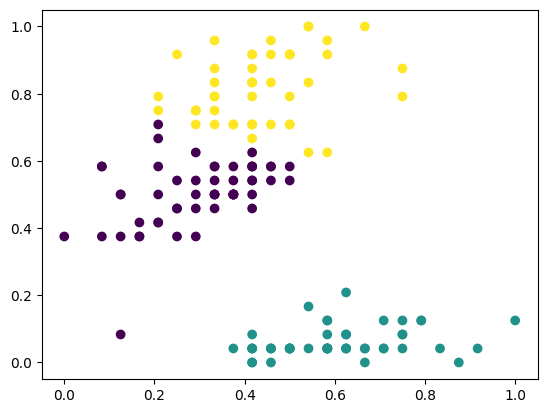

In [32]:
plt.scatter(datad_normal['sepal.width'],datad_normal ['petal.width'],c=cluster)
plt.plot()

Apakah hasilnya baik? Mengapa?

- baik tapi kurang karena masih ada potensi menyatu

E. Petal length vs Petal width

In [33]:
cluster = kmeans(datae_normal,3)
print(cluster)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


[]

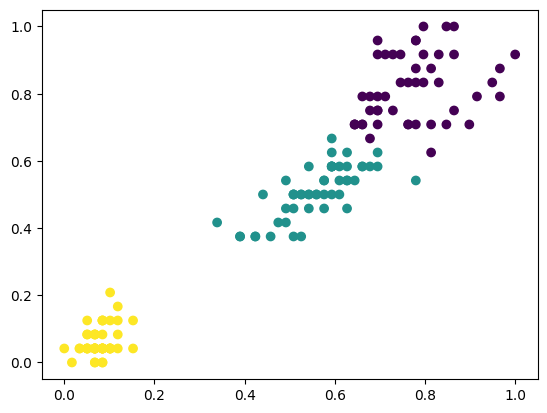

In [34]:
plt.scatter(datae_normal['petal.length'],datae_normal ['petal.width'],c=cluster)
plt.plot()

Apakah hasilnya baik? Mengapa?

- kurang, banyak yang hampir menyatu